In [1]:
import seaborn
import pandas as pd
import sklearn.preprocessing
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering, Birch, DBSCAN, OPTICS
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("data/Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


C:\Users\acer\AppData\Local\Temp\ipykernel_19204\3185633565.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(data.corr())


<AxesSubplot:>

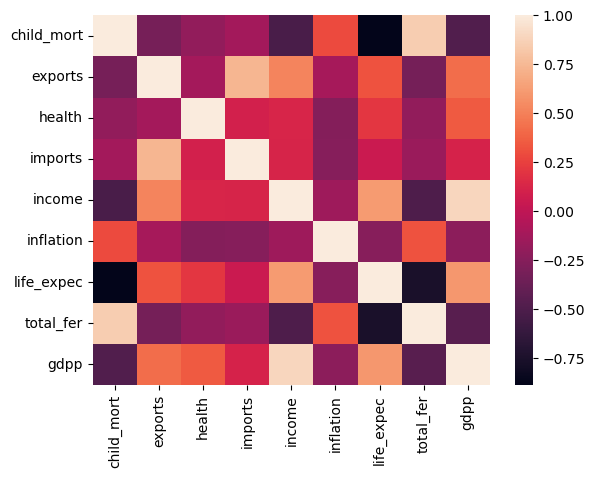

In [6]:
seaborn.heatmap(data.corr())

<AxesSubplot:>

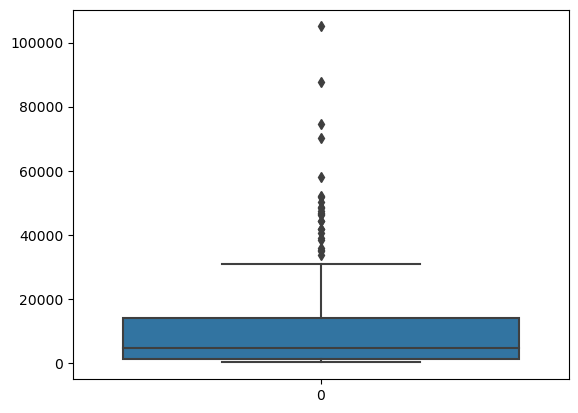

In [7]:
seaborn.boxplot(data['gdpp'])

<AxesSubplot:>

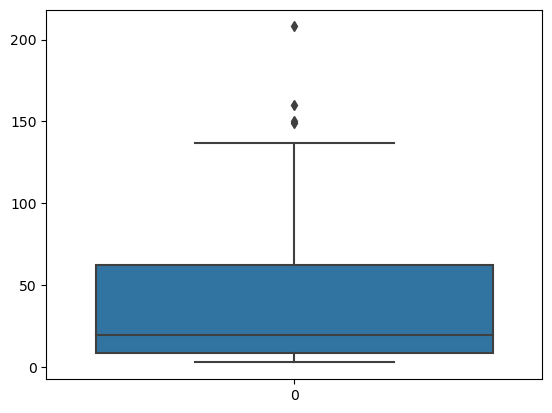

In [8]:
seaborn.boxplot(data['child_mort'])

<AxesSubplot:>

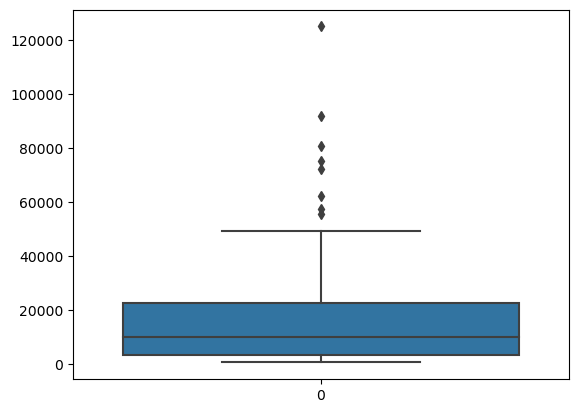

In [9]:
seaborn.boxplot(data['income'])

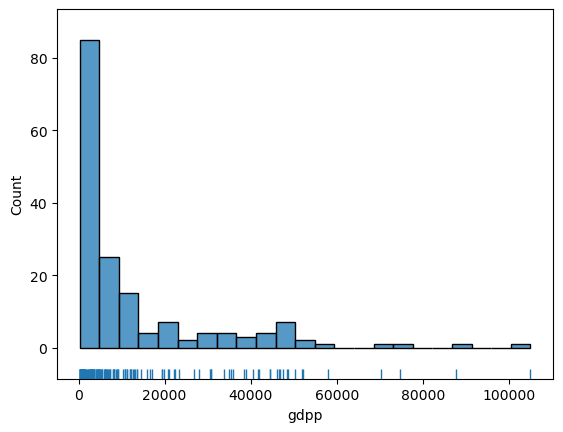

In [10]:
seaborn.rugplot(data['gdpp'], expand_margins=True)
seaborn.histplot(data['gdpp'])
plt.show()

In [11]:
display("Countries with gdpp higher 60000", data[data['gdpp'] > 60000])

'Countries with gdpp higher 60000'

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


<AxesSubplot:xlabel='gdpp', ylabel='income'>

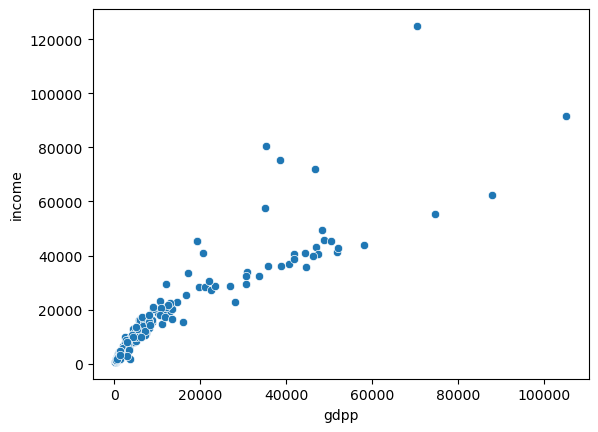

In [12]:
seaborn.scatterplot(data, x = "gdpp", y = "income")

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

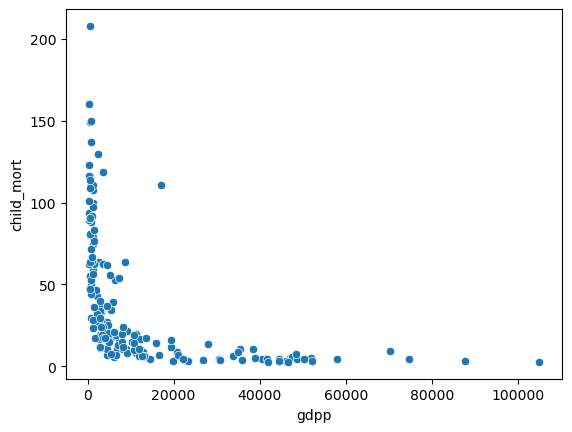

In [13]:
seaborn.scatterplot(data, x = "gdpp", y = "child_mort")

<AxesSubplot:xlabel='income', ylabel='child_mort'>

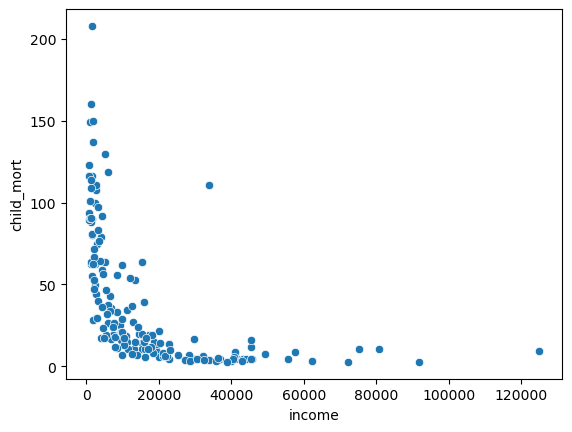

In [14]:
seaborn.scatterplot(data, x = "income", y = "child_mort")

In [15]:

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[data.columns[1:]])
data_normalized = pd.DataFrame(data_normalized, columns=data.columns[1:], index=data.index)
data_normalized


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


C:\Users\acer\anaconda3\envs\dsml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


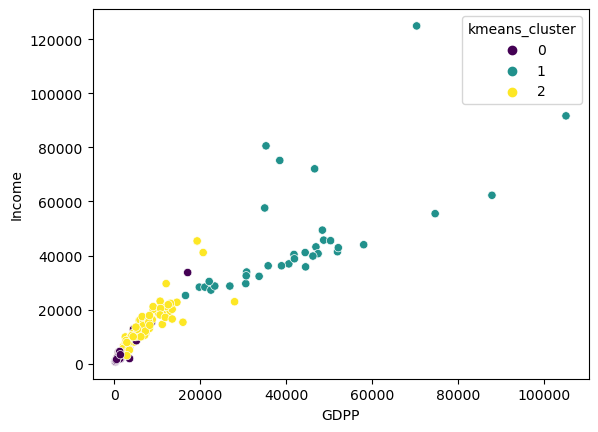

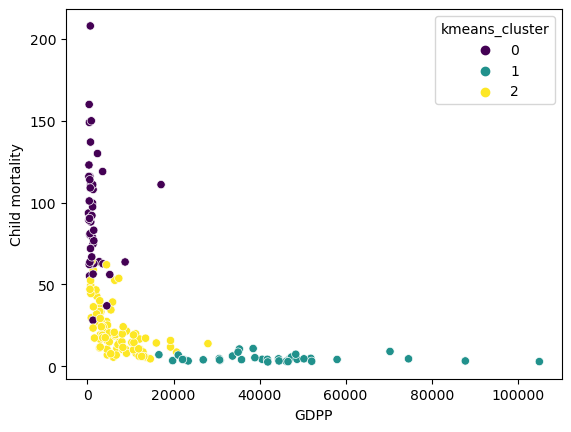

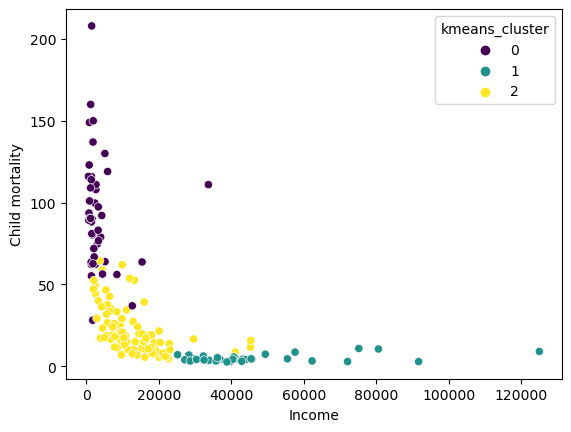

In [16]:

data['kmeans_cluster'] = KMeans(3).fit_predict(data_normalized)

seaborn.scatterplot(data, x="gdpp", y="income", hue='kmeans_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='kmeans_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='kmeans_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

C:\Users\acer\anaconda3\envs\dsml\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


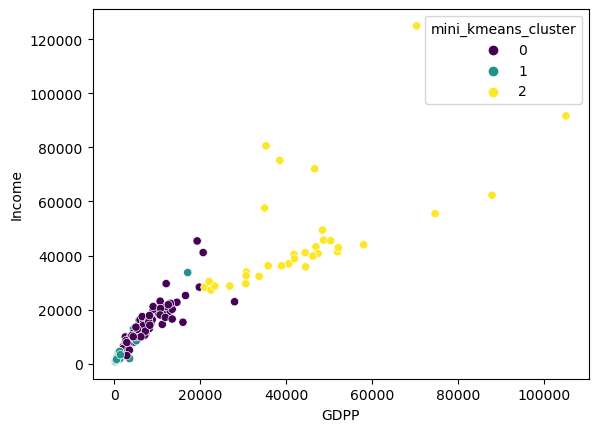

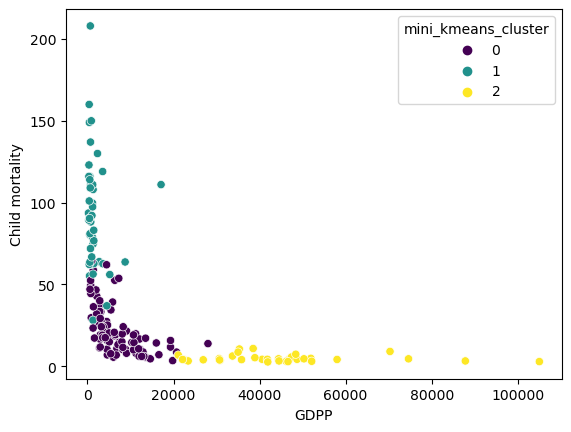

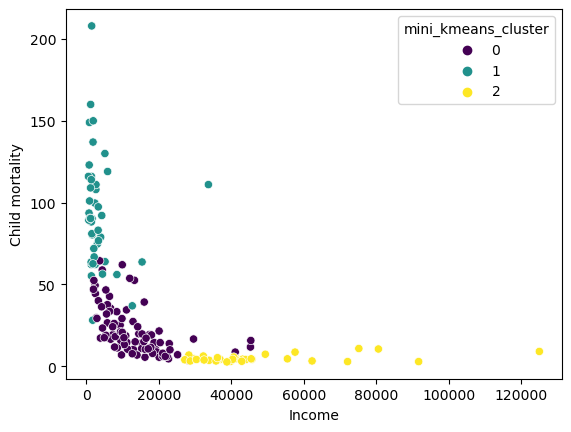

In [17]:

data['mini_kmeans_cluster'] = MiniBatchKMeans(3).fit_predict(data_normalized)

seaborn.scatterplot(data, x="gdpp", y="income", hue='mini_kmeans_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='mini_kmeans_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='mini_kmeans_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

C:\Users\acer\anaconda3\envs\dsml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


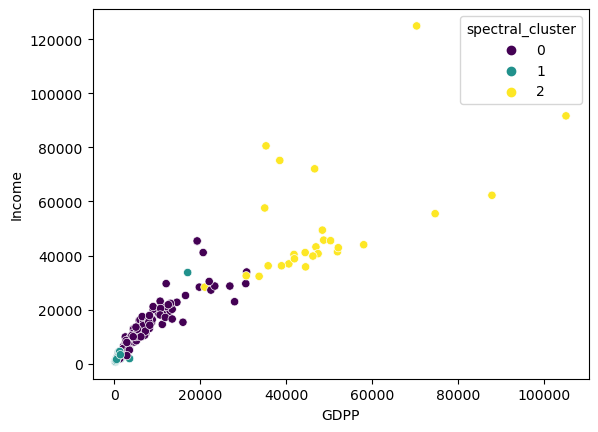

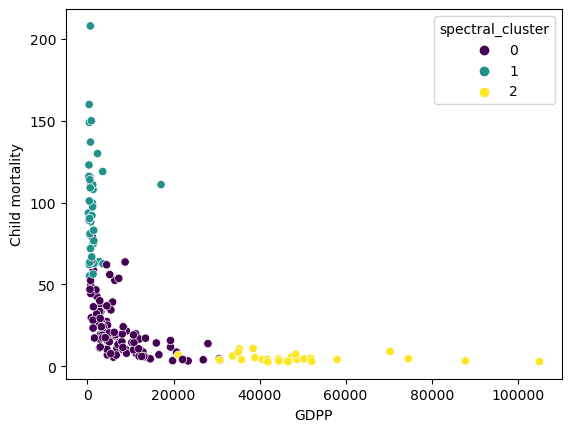

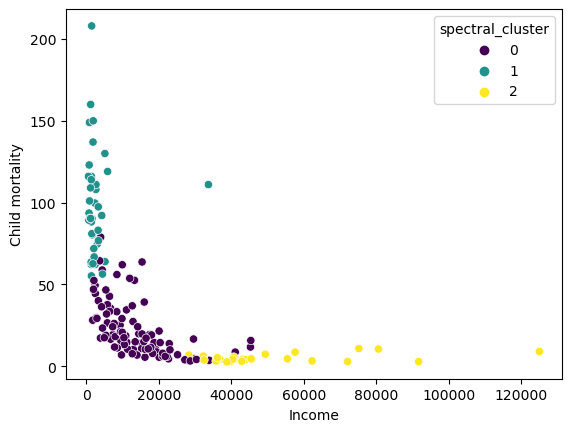

In [18]:
data['spectral_cluster'] = SpectralClustering(3).fit_predict(data_normalized)

seaborn.scatterplot(data, x="gdpp", y="income", hue='spectral_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='spectral_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='spectral_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

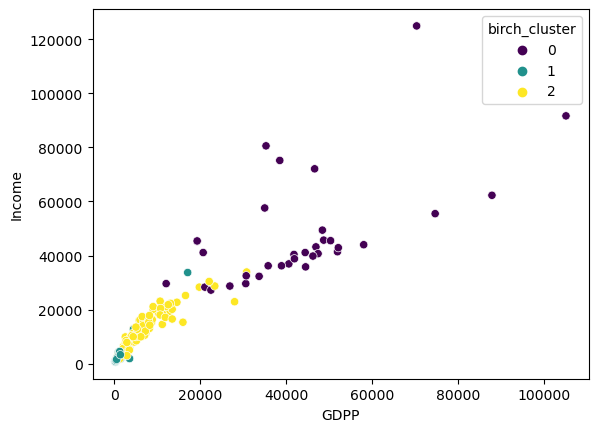

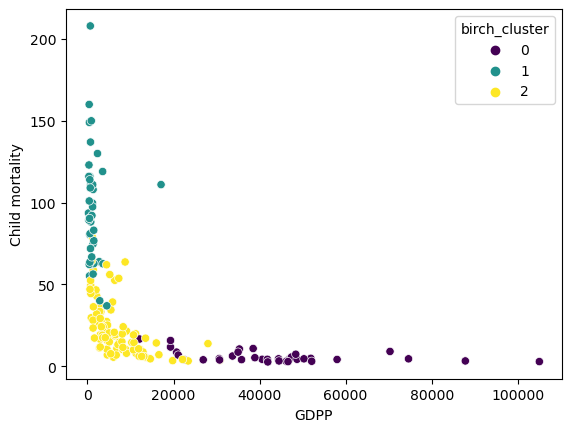

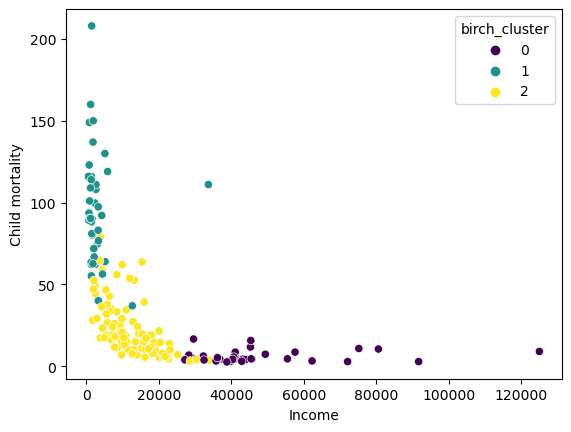

In [19]:

data['birch_cluster'] = Birch(threshold=0.08, n_clusters=3).fit_predict(data_normalized)
seaborn.scatterplot(data, x="gdpp", y="income", hue='birch_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='birch_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='birch_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

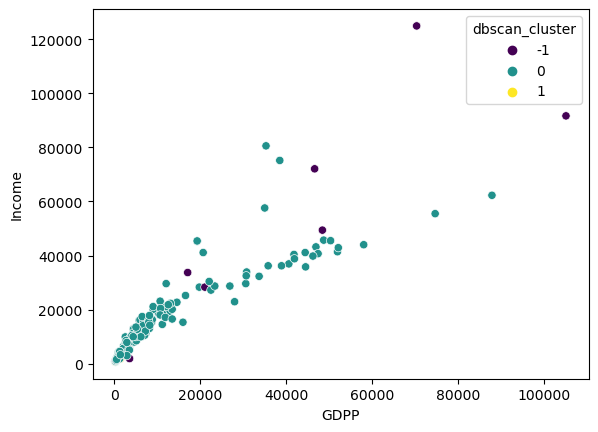

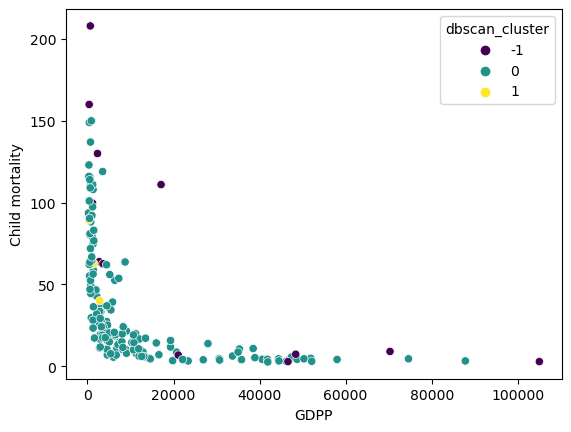

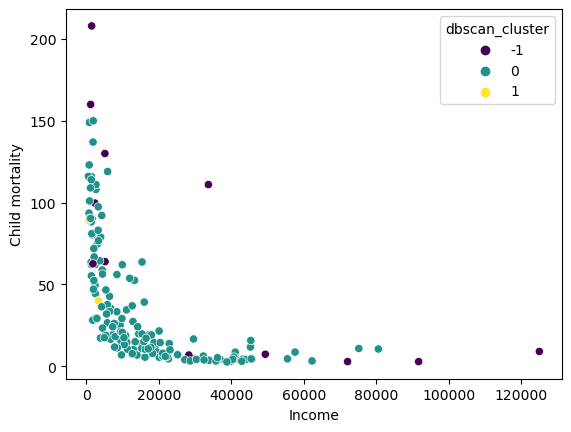

In [20]:

data['dbscan_cluster'] = DBSCAN(eps=0.3, min_samples=2).fit_predict(data_normalized)
seaborn.scatterplot(data, x="gdpp", y="income", hue='dbscan_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='dbscan_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='dbscan_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

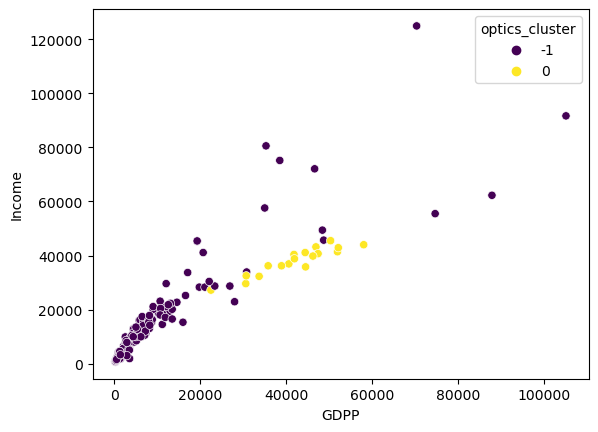

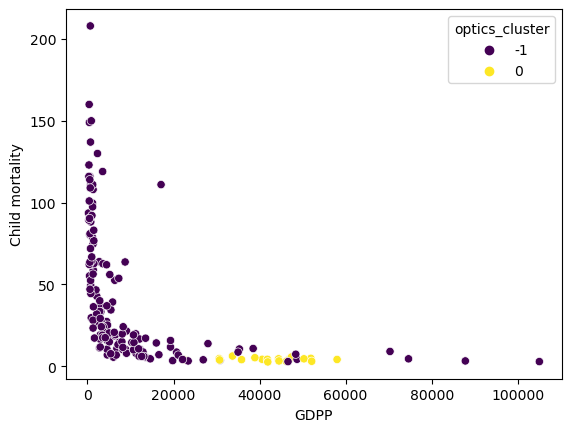

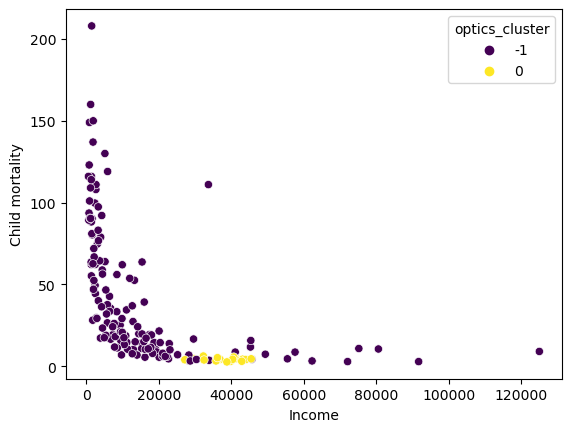

In [21]:

data['optics_cluster'] = OPTICS(eps=0.6, min_samples=10).fit_predict(data_normalized)
seaborn.scatterplot(data, x="gdpp", y="income", hue='optics_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Income')
plt.show()

seaborn.scatterplot(data, x="gdpp", y="child_mort", hue='optics_cluster', palette='viridis')
plt.xlabel('GDPP')
plt.ylabel('Child mortality')
plt.show()

seaborn.scatterplot(data, x="income", y="child_mort", hue='optics_cluster', palette='viridis')
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.show()

In [22]:
display(data)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster,mini_kmeans_cluster,spectral_cluster,birch_cluster,dbscan_cluster,optics_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,1,1,0,-1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,2,0,-1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0,2,0,-1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,1,1,0,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0,0,2,0,-1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,0,0,2,0,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,2,0,-1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,1,1,0,-1


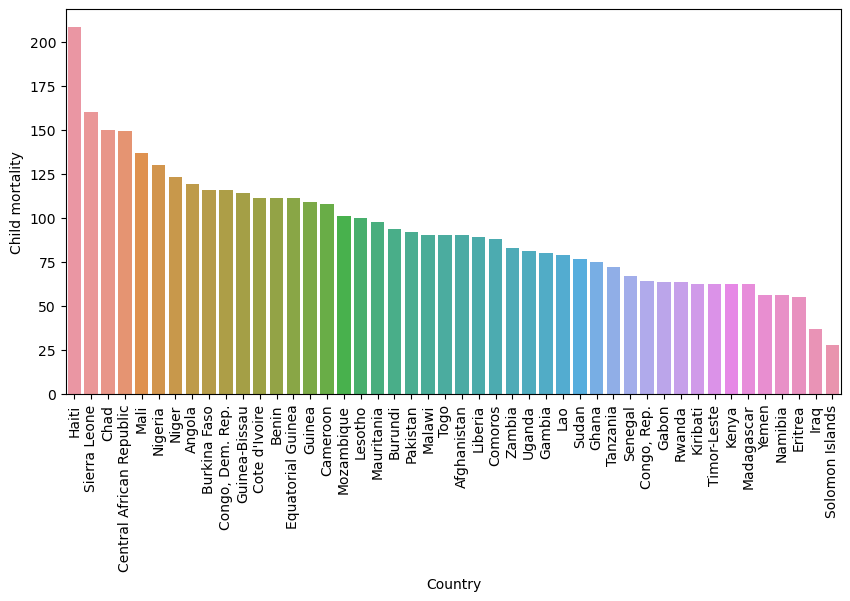

In [27]:
data_by_child_mort = data[data['kmeans_cluster'] == 0].sort_values(by='child_mort', ascending=False)

fig = plt.figure(figsize= (10,5))
s=seaborn.barplot(x='country',y='child_mort',data=data_by_child_mort)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('Child mortality')
plt.show()

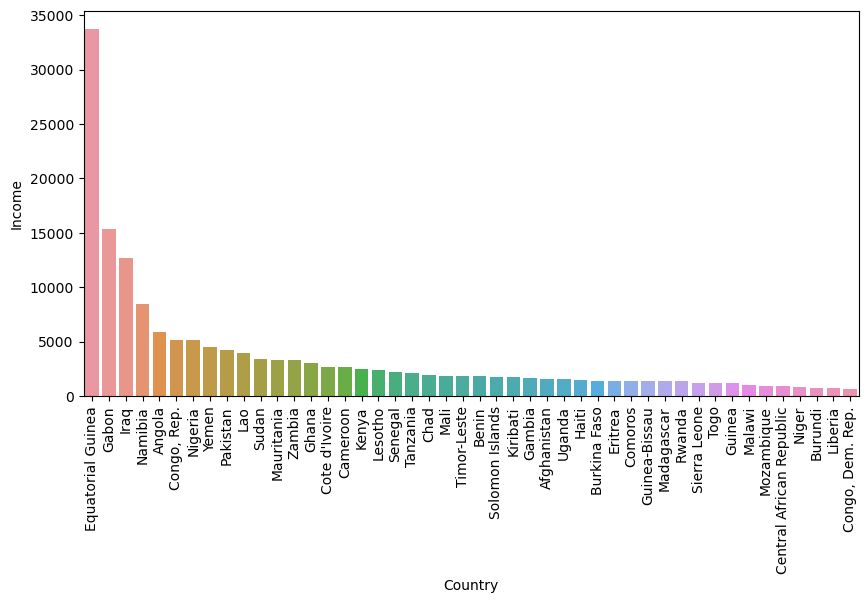

In [28]:
data_by_income = data[data['kmeans_cluster'] == 0].sort_values(by='income', ascending=False)

fig = plt.figure(figsize= (10,5))
s=seaborn.barplot(x='country',y='income',data=data_by_income)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('Income')
plt.show()

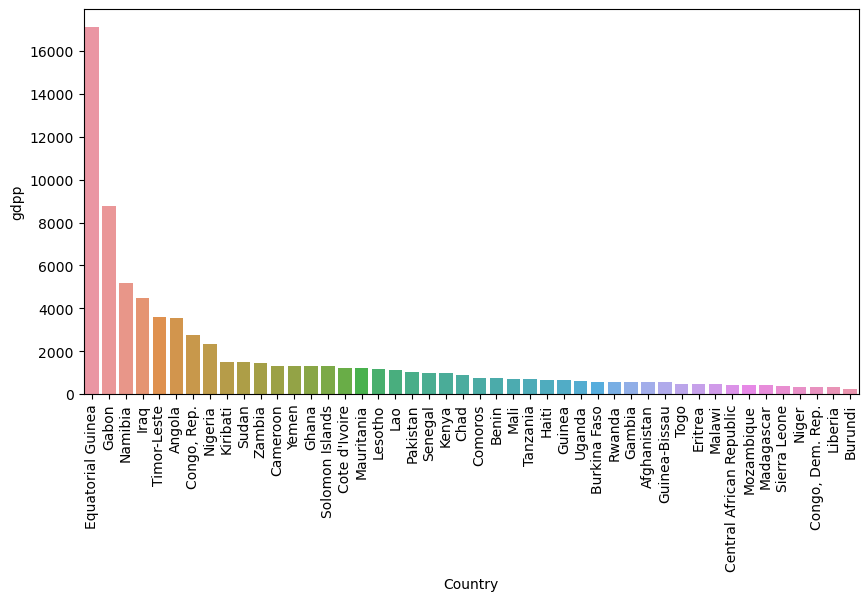

In [29]:
data_by_gdpp = data[data['kmeans_cluster'] == 0].sort_values(by='gdpp', ascending=False)

fig = plt.figure(figsize= (10,5))
s=seaborn.barplot(x='country',y='gdpp',data=data_by_gdpp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country')
plt.ylabel('gdpp')
plt.show()

In [30]:
display(data[data['kmeans_cluster'] == 0].sort_values(by=['child_mort', 'income','gdpp'], ascending=[False, True, True]).drop(['kmeans_cluster', 'mini_kmeans_cluster', 'spectral_cluster', 'birch_cluster', 'dbscan_cluster', 'optics_cluster'], axis=1)[:10])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
